# Ricci Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  118 non-null    object 
 1   Oral      118 non-null    float64
 2   Written   118 non-null    int64  
 3   Race      118 non-null    object 
 4   Combine   118 non-null    float64
 5   Class     118 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 5.7+ KB
target count
0    62
1    56
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

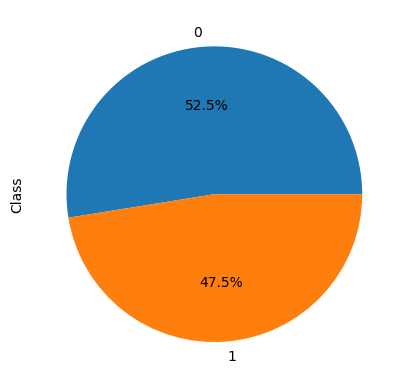

In [4]:
df = pd.read_csv("../Cleaned/Ricci/ricci.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['Class'].value_counts())
df['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Race

W    68
B    27
H    23
Name: Race, dtype: int64


<AxesSubplot:ylabel='Race'>

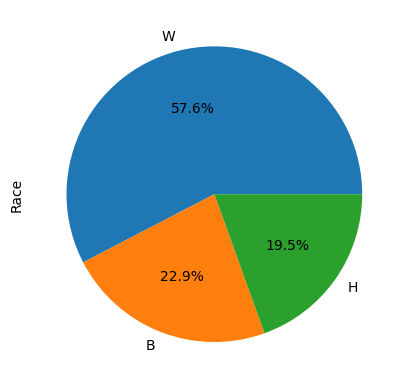

In [6]:
print(df['Race'].value_counts())
df['Race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = W

1    41
0    27
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

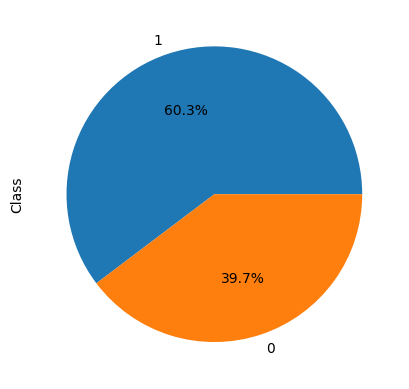

In [7]:
print(df.loc[df['Race']=="W"]['Class'].value_counts())
df.loc[df['Race']=="W"]['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = B

0    18
1     9
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

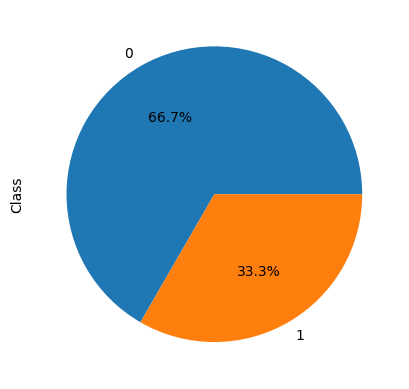

In [8]:
print(df.loc[df['Race']=="B"]['Class'].value_counts())
df.loc[df['Race']=="B"]['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = H

0    17
1     6
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

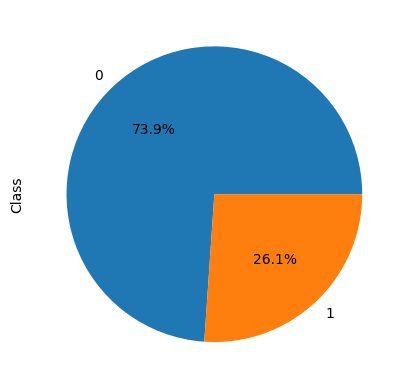

In [9]:
print(df.loc[df['Race']=="H"]['Class'].value_counts())
df.loc[df['Race']=="H"]['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = W

let s1 = not W

In [10]:
# p(y+|s0) -> p(1|W)
p1 = len(df.loc[(df['Race']=="W") & (df['Class']>0.5)]) / len(df.loc[df['Race']=="W"])
#print(p1)
# p(y-|s1) -> p(0|!W)
p2 = len(df.loc[(df['Race']!="W") & (df['Class']<0.5)]) / len(df.loc[df['Race']!="W"])
#print(p2)
# p(y+|s1) -> p(1|!W)
p3 = len(df.loc[(df['Race']!="W") & (df['Class']>0.5)]) / len(df.loc[df['Race']!="W"])
#print(p3)
# p(y-|s0) -> p(0|W)
p4 = len(df.loc[(df['Race']=="W") & (df['Class']<0.5)]) / len(df.loc[df['Race']=="W"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 3.543


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = W

let s1 = not W

In [11]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 2.010


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = B

let s1 = not B

In [12]:
# p(y+|s0) -> p(1|B)
p1 = len(df.loc[(df['Race']=="B") & (df['Class']>0.5)]) / len(df.loc[df['Race']=="B"])
#print(p1)
# p(y-|s1) -> p(0|!B)
p2 = len(df.loc[(df['Race']!="B") & (df['Class']<0.5)]) / len(df.loc[df['Race']!="B"])
#print(p2)
# p(y+|s1) -> p(1|!B)
p3 = len(df.loc[(df['Race']!="B") & (df['Class']>0.5)]) / len(df.loc[df['Race']!="B"])
#print(p3)
# p(y-|s0) -> p(0|B)
p4 = len(df.loc[(df['Race']=="B") & (df['Class']<0.5)]) / len(df.loc[df['Race']=="B"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.468


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = B

let s1 = not B

In [13]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.645


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = H

let s1 = not H

In [14]:
# p(y+|s0) -> p(1|H)
p1 = len(df.loc[(df['Race']=="H") & (df['Class']>0.5)]) / len(df.loc[df['Race']=="H"])
#print(p1)
# p(y-|s1) -> p(0|!H)
p2 = len(df.loc[(df['Race']!="H") & (df['Class']<0.5)]) / len(df.loc[df['Race']!="H"])
#print(p2)
# p(y+|s1) -> p(1|!H)
p3 = len(df.loc[(df['Race']!="H") & (df['Class']>0.5)]) / len(df.loc[df['Race']!="H"])
#print(p3)
# p(y-|s0) -> p(0|H)
p4 = len(df.loc[(df['Race']=="H") & (df['Class']<0.5)]) / len(df.loc[df['Race']=="H"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.318


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = H

let s1 = not H

In [15]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.496


### Proxies

Most of the proxies found for race include (a combination of):
 - native-country
 - relationship
 - education
 - occupation


Best model (min depth) found with a node at depth 1 with 8 samples.

	** Written <= 56.5 ,  #impurity: 0.0, #samples: 8.

Best model (max sample) found with 15 sample in a node at depth 2.

	** Combine > 67.59400177001953 , Combine > 80.2760009765625 ,  #impurity: 0.0, #samples: 15.



For proxy: Written <= 56.5

B    8
Name: Race, dtype: int64


<AxesSubplot:ylabel='Race'>

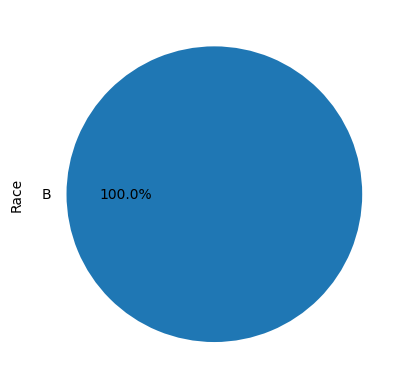

In [16]:
print(df.loc[(df['Written']<=56.5)]['Race'].value_counts())
df.loc[(df['Written']<=56.5)]['Race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

0    8
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

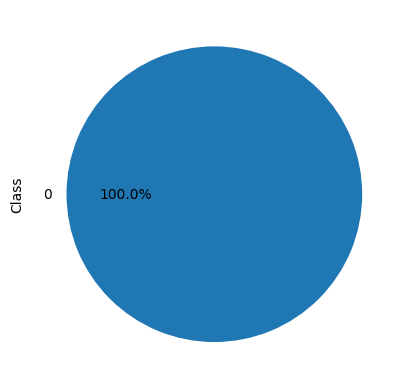

In [17]:
print(df.loc[(df['Written']<=56.5)]['Class'].value_counts())
df.loc[(df['Written']<=56.5)]['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [18]:
# p(y+|s0) -> p(>50K|Proxy)
p1 = len(df.loc[(df['Written']<=56.5) & (df['Class']>0.5)]) / len(df.loc[(df['Written']<=56.5)])
#print(p1)
# p(y-|s1) -> p(<=50K|!Proxy)
p2 = len(df.loc[(df['Written']>56.5) & (df['Class']<0.5)]) / len(df.loc[(df['Written']>56.5)])
#print(p2)
# p(y+|s1) -> p(>50K|!Proxy)
p3 = len(df.loc[(df['Written']>56.5) & (df['Class']>0.5)]) / len(df.loc[(df['Written']>56.5)])
#print(p3)
# p(y-|s0) -> p(<=50K|Proxy)
p4 = len(df.loc[(df['Written']<=56.5) & (df['Class']<0.5)]) / len(df.loc[(df['Written']<=56.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.000


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [19]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.000


For proxy: Combine > 80.2760009765625

W    15
Name: Race, dtype: int64


<AxesSubplot:ylabel='Race'>

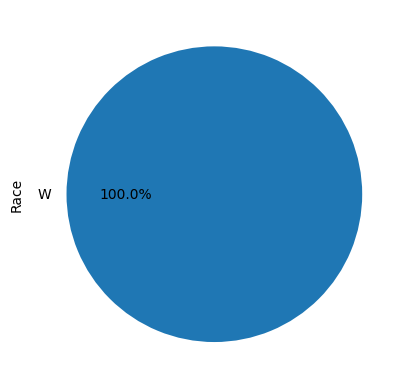

In [20]:
print(df.loc[(df['Combine']>80.2760009765625)]['Race'].value_counts())
df.loc[(df['Combine']>80.2760009765625)]['Race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1    15
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

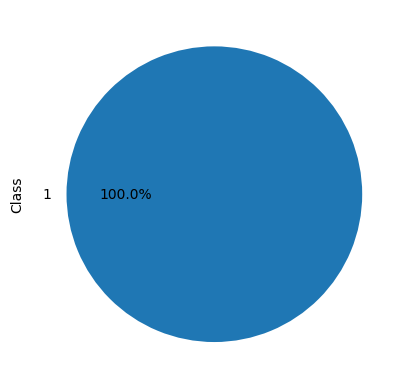

In [21]:
print(df.loc[(df['Combine']>80.2760009765625)]['Class'].value_counts())
df.loc[(df['Combine']>80.2760009765625)]['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [22]:
# p(y+|s0) -> p(1|Proxy)
p1 = len(df.loc[(df['Combine']>80.2760009765625) & (df['Class']>0.5)]) / len(df.loc[(df['Combine']>80.2760009765625)])
#print(p1)
# p(y-|s1) -> p(0|!Proxy)
p2 = len(df.loc[(df['Combine']<=80.2760009765625) & (df['Class']<0.5)]) / len(df.loc[(df['Combine']<=80.2760009765625)])
#print(p2)
# p(y+|s1) -> p(1|!Proxy)
p3 = len(df.loc[(df['Combine']<=80.2760009765625) & (df['Class']>0.5)]) / len(df.loc[(df['Combine']<=80.2760009765625)])
#print(p3)
# p(y-|s0) -> p(0|Proxy)
p4 = len(df.loc[(df['Combine']>80.2760009765625) & (df['Class']<0.5)]) / len(df.loc[(df['Combine']>80.2760009765625)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

ZeroDivisionError: float division by zero

### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1

let y- = 0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [23]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 2.512
